In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and routes.
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")
# Display the first rows for all dataframes
print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

# print(airports["latitude"].describe())
# latitude appears to go from -90 to 90

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


In [27]:
from mpl_toolkits.basemap import Basemap

In [28]:
# Create a new basemap instance
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

C:\Users\sivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [29]:
# Convert the longitude and latitude values from spherical to Cartesian
# Need to pass lists as argument, so convert series to lists first
x, y = m(airports["longitude"].tolist(),airports["latitude"].tolist())

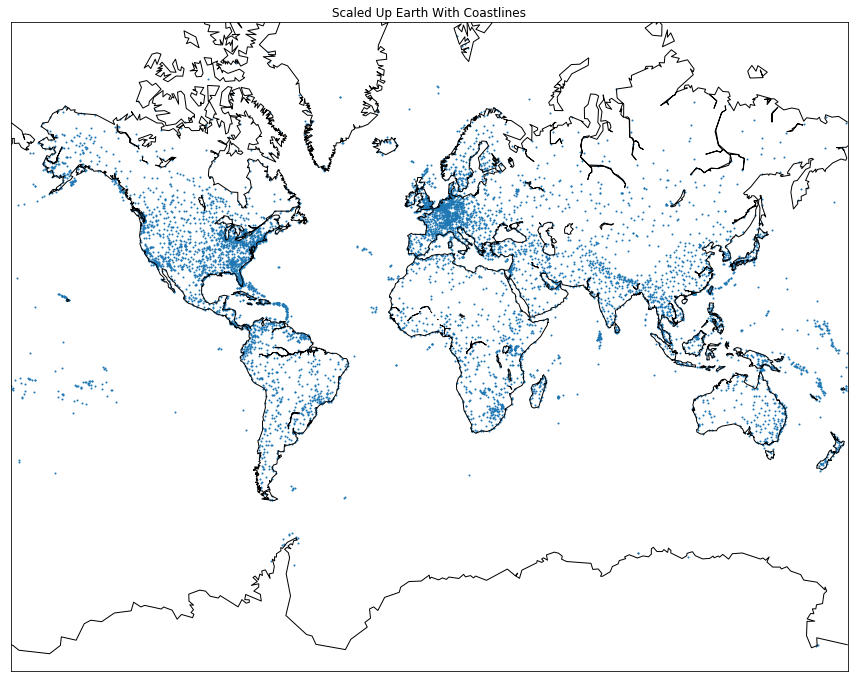

In [36]:
# Setup plot before creating scatter
# Create a figure with a height of 20 inches and a width of 15 inches
fig, ax = plt.subplots(figsize=(15,20))
# Set the title of the scatter plot
ax.set_title("Scaled Up Earth With Coastlines")

# plot the coordinates on a map using basemap.scatter()
m.scatter(x, y, s=1)
# enable the coast lines to be displayed.
m.drawcoastlines()
plt.show()

In [33]:
# Read geo_routes.csv into a dataframe 
geo_routes = pd.read_csv("geo_routes.csv")
# look for columns containing any null values
print(geo_routes.info())
geo_routes.dropna(inplace=True)
print(geo_routes.info())
# Display the first five rows
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67410 entries, 0 to 67427
Data columns (total 8 columns):
airline      67410 non-null object
source       67410 non-null object
dest         67410 non-null object
equipment    67410 non-null object
start_lon    67410 non-null float64
end_lon      67410 non-null float64
start_lat    67410 non-null float64
end_lat      67410 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.6+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN     

In [49]:
# function that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180.
def create_great_circles(df):
    # Iterate over the rows in the dataframe
    for index, row in df.iterrows():
        if abs(row["end_lat"]-row["start_lat"]) < 180:
            if abs(row["end_lon"]-row["start_lon"]) < 180:
                # Draw a great circle using the four geographic coordinates
                m.drawgreatcircle(row["start_lon"], row["start_lat"], row["end_lon"], row["end_lat"])

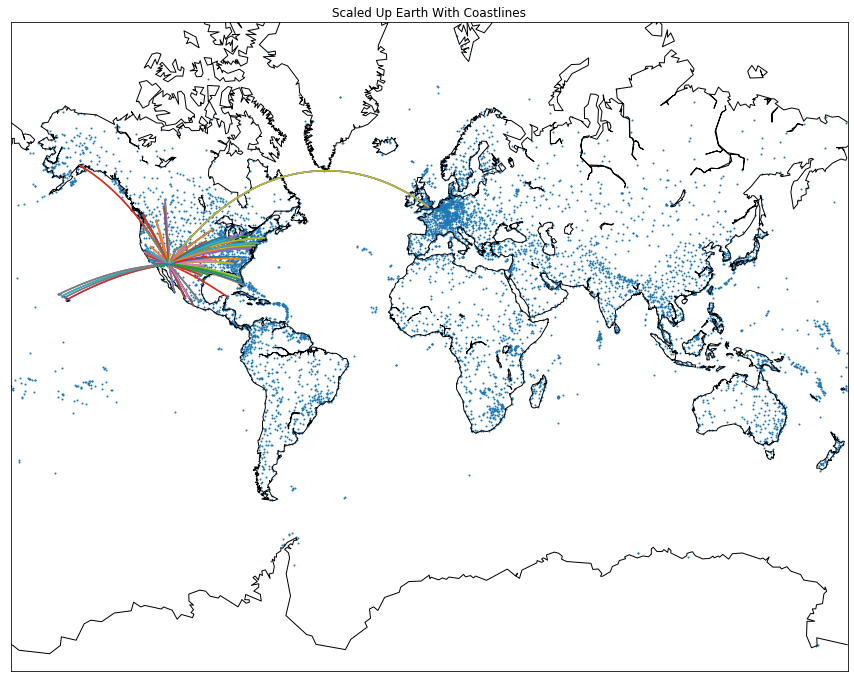

In [54]:
# Looking for data for DFW. Create filtered dataframe containing just the routes that start at the DFW airport
bool_dfw = geo_routes["source"] == "PHX"
dfw = geo_routes[bool_dfw]

# Setup plot before creating scatter
# Create a figure with a height of 20 inches and a width of 15 inches
fig, ax = plt.subplots(figsize=(15,20))
# Set the title of the scatter plot
ax.set_title("Scaled Up Earth With Coastlines")

# plot the coordinates on a map using basemap.scatter()
m.scatter(x, y, s=1)
# enable the coast lines to be displayed.
m.drawcoastlines()
create_great_circles(dfw)
plt.show()